# **Step 1: Setup and Data Loading**
1. Import Required Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Data

In [49]:
customers = pd.read_csv('Customers.csv')
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

3. Inspect the Data

In [50]:
print(customers.head())
print(customers.info())
print(customers.describe())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America

In [51]:
print(products.head())
print(products.info())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [52]:
print(transactions.head())
print(transactions.info())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5

# **Step 2: Data Cleaning**
1. Check for Missing Values

In [53]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


2. Handling Missing Values:

    Replace missing categorical data with the mode.
    Replace missing numerical data with the mean or median.

In [54]:
customers['Region'].fillna(customers['Region'].mode()[0], inplace=True)
products['Price'].fillna(products['Price'].mean(), inplace=True)

<ipython-input-54-ac90a2300763>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['Region'].fillna(customers['Region'].mode()[0], inplace=True)
<ipython-input-54-ac90a2300763>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

3. Check for Duplicate Rows

In [55]:
print(customers.duplicated().sum())
customers.drop_duplicates(inplace=True)

0


4. Convert Columns to Correct Data Types

In [56]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# **Step 3: Data Merging**
1. Merge Datasets

In [57]:
merged_data = transactions.merge(customers, on='CustomerID', how='left') \
                          .merge(products, on='ProductID', how='left')

2. Inspect the Merged Data

In [58]:
print(merged_data.head())
print(merged_data.info())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic


3. Descriptive Statistics

In [60]:
print(merged_data.describe())
print(merged_data['Category'].value_counts())
print(merged_data['Region'].value_counts())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

4. Correlation Analysis

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price_x                   float64
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
ProductName                object
Category                   object
Price_y                   float64
dtype: object


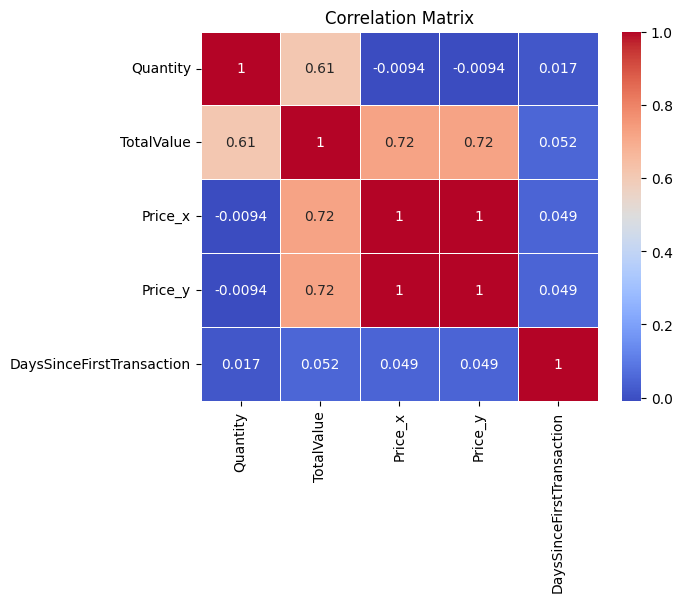

In [61]:
print(merged_data.dtypes)

# Convert 'TransactionDate' to numeric (days since the first transaction)
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['DaysSinceFirstTransaction'] = (merged_data['TransactionDate'] - merged_data['TransactionDate'].min()).dt.days

# Select numeric columns only
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr_matrix = merged_data[numeric_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **Step 4: Exploratory Data Analysis (EDA)**

**1. Customer Analysis**

    a. Signup Trends

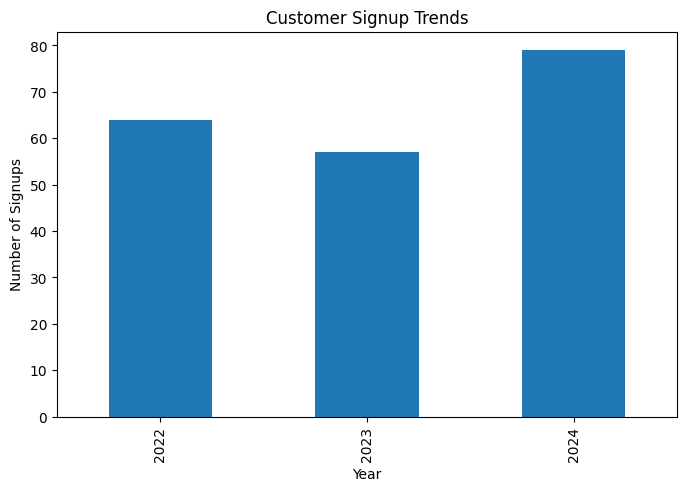

In [62]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers.groupby('SignupYear').size()
signup_trends.plot(kind='bar', title='Customer Signup Trends', figsize=(8, 5))
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


b. Region Distribution

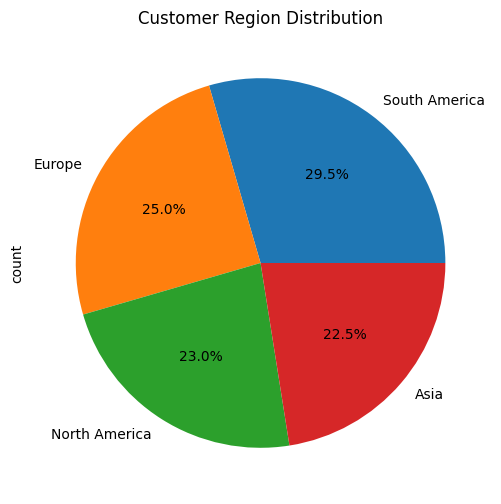

In [63]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='pie', autopct='%1.1f%%', title='Customer Region Distribution', figsize=(6, 6))
plt.show()


**2. Product Analysis**

a. Top-Selling Products:

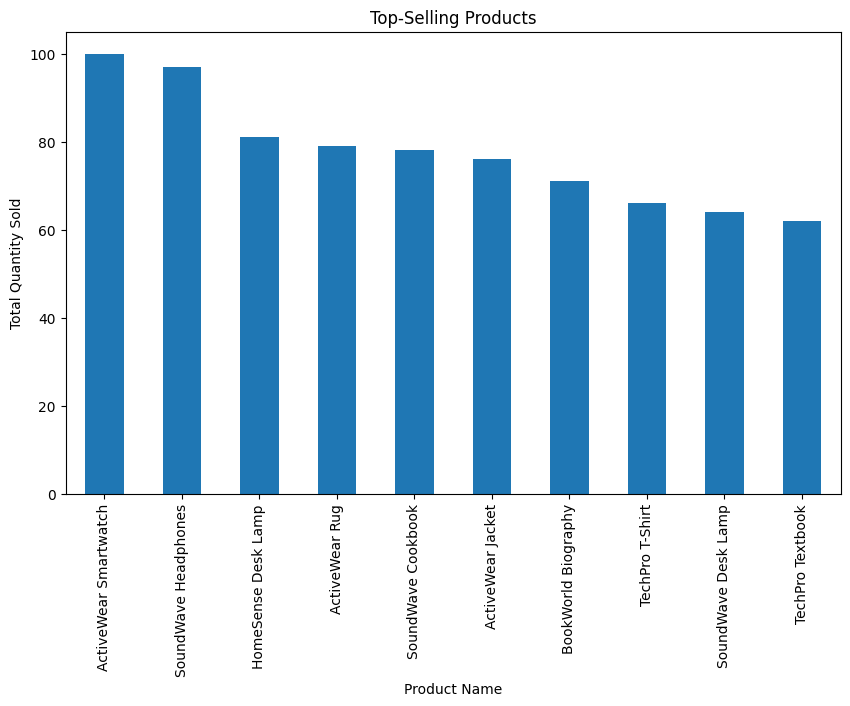

In [64]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top-Selling Products', figsize=(10, 6))
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()


b. Category Revenue Contribution

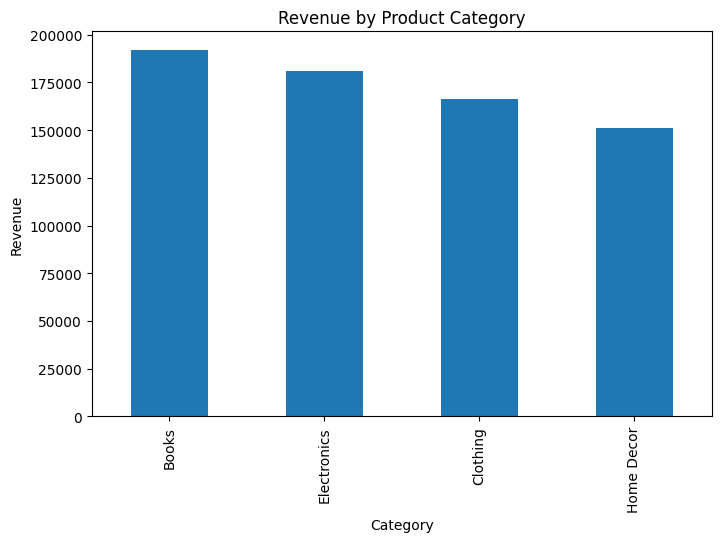

In [65]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title='Revenue by Product Category', figsize=(8, 5))
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()


**3. Transaction Analysis**

a. Monthly Sales Trends

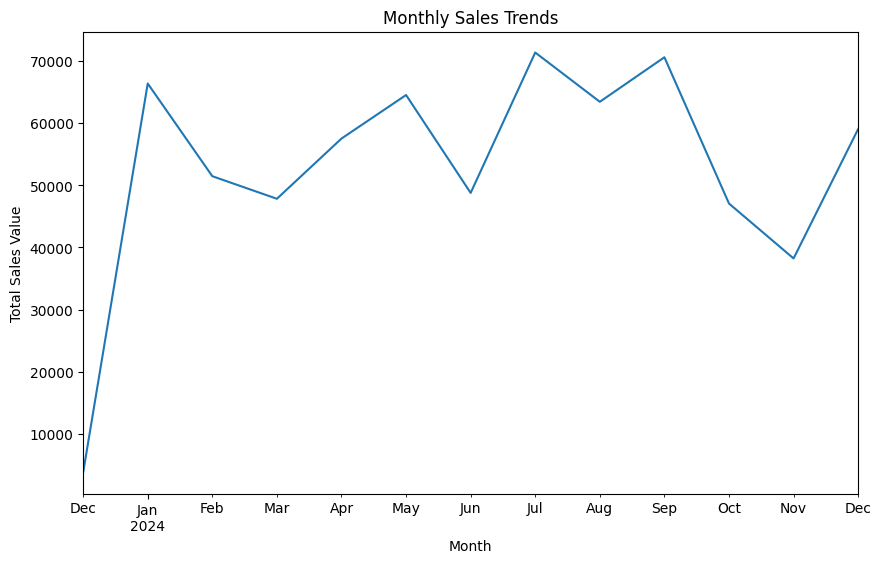

In [66]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
sales_trends = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
sales_trends.plot(title='Monthly Sales Trends', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.show()


b. Peak Sales Period

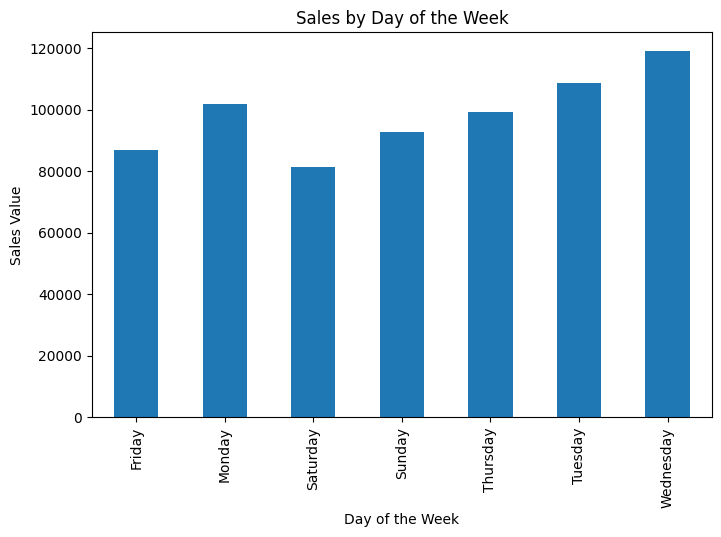

In [67]:
merged_data['DayOfWeek'] = merged_data['TransactionDate'].dt.day_name()
day_sales = merged_data.groupby('DayOfWeek')['TotalValue'].sum()
day_sales.plot(kind='bar', title='Sales by Day of the Week', figsize=(8, 5))
plt.xlabel('Day of the Week')
plt.ylabel('Sales Value')
plt.show()


4. Price vs. Quantity Relationship

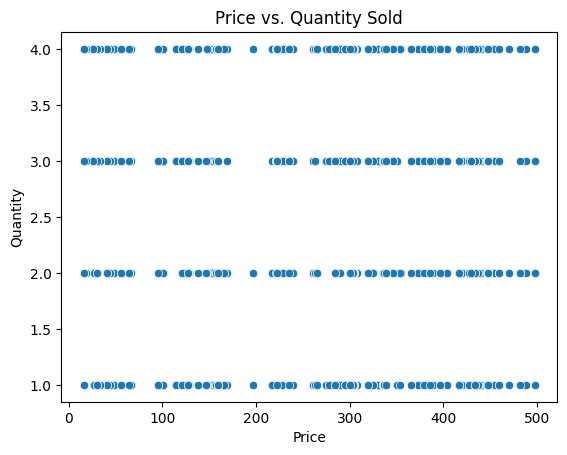

In [68]:
merged_data = merged_data.drop(columns=['Price_x'])
merged_data = merged_data.rename(columns={'Price_y': 'Price'})

sns.scatterplot(x='Price', y='Quantity', data=merged_data)
plt.title('Price vs. Quantity Sold')
plt.show()


**4. Trend Analysis**

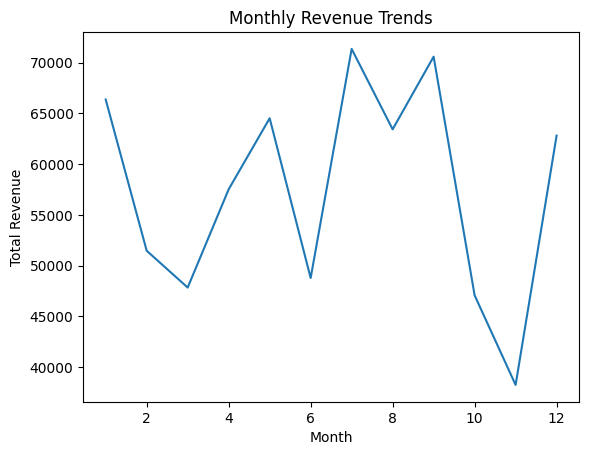

In [69]:
# Time-based trend analysis (monthly sales)
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.month
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

5. Customer Segmentation (Demographic Insights)

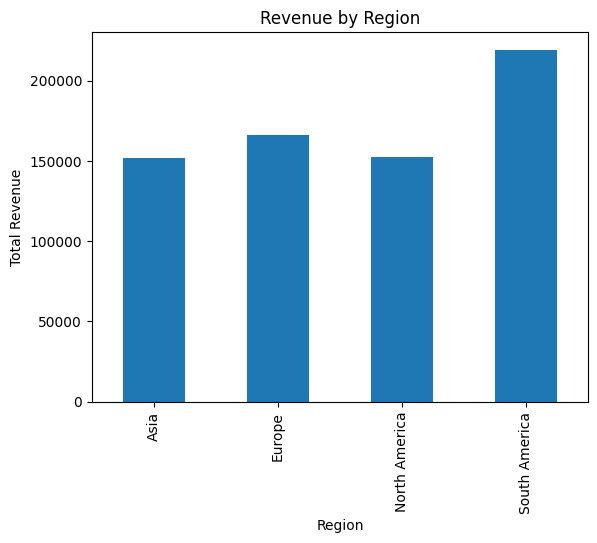

In [71]:
# Customer Segmentation: Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()
region_revenue.plot(kind='bar')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.show()


6. Outlier Detection

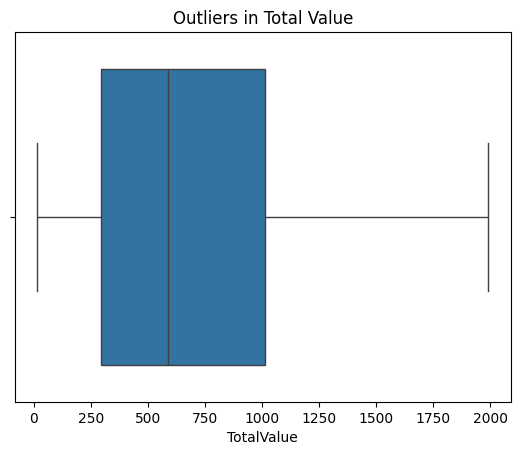

In [72]:
# Outlier detection for TotalValue using Boxplot
sns.boxplot(x=merged_data['TotalValue'])
plt.title('Outliers in Total Value')
plt.show()


7. Customer Purchase Behavior

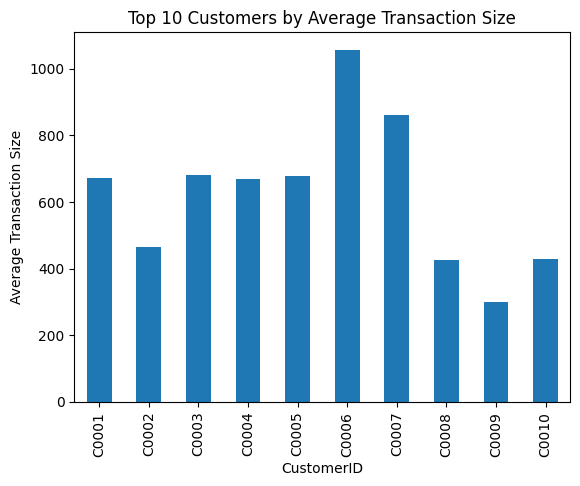

In [76]:
# Average transaction size per customer
customer_avg_transaction = merged_data.groupby('CustomerID')['TotalValue'].mean()
customer_avg_transaction.head(10).plot(kind='bar')
plt.title('Top 10 Customers by Average Transaction Size')
plt.ylabel('Average Transaction Size')
plt.show()


8. Customer Retention Insights

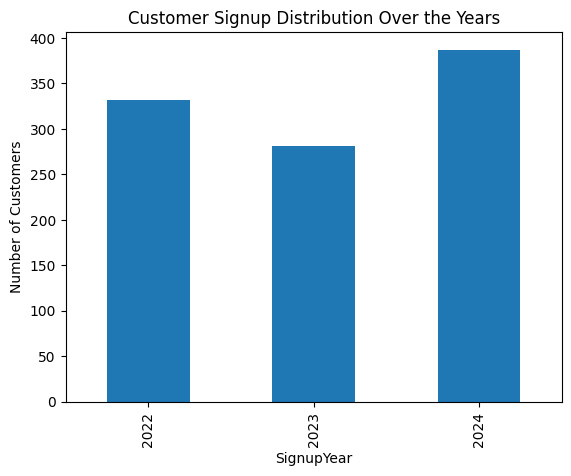

In [77]:
# Customer Retention Insights based on Signup Year
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['SignupYear'] = merged_data['SignupDate'].dt.year
signup_distribution = merged_data['SignupYear'].value_counts().sort_index()
signup_distribution.plot(kind='bar')
plt.title('Customer Signup Distribution Over the Years')
plt.ylabel('Number of Customers')
plt.show()


9. High-Value Customers

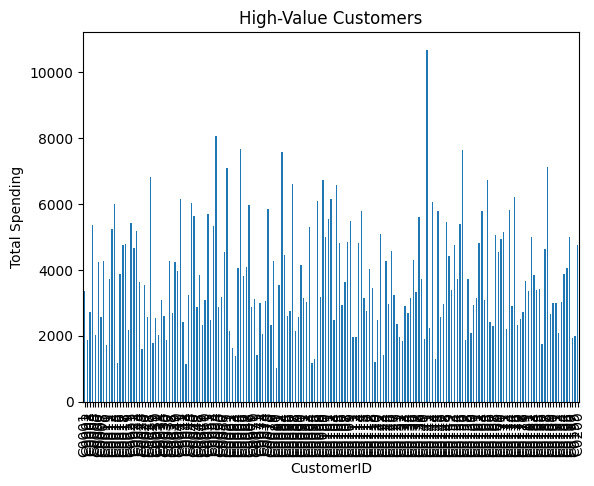

In [78]:
# High-Value Customers (spending more than $1000)
high_value_customers = merged_data.groupby('CustomerID')['TotalValue'].sum()
high_value_customers = high_value_customers[high_value_customers > 1000]
high_value_customers.plot(kind='bar')
plt.title('High-Value Customers')
plt.ylabel('Total Spending')
plt.show()


10. Frequency of Transactions by Customer

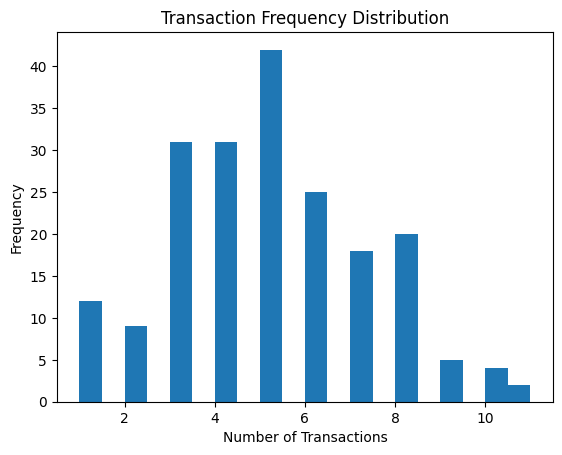

In [79]:
# Frequency of Transactions by Customer
transaction_frequency = merged_data.groupby('CustomerID').size()
transaction_frequency.plot(kind='hist', bins=20)
plt.title('Transaction Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.show()
